# Test CCDPROC for Observations for the night July 07th 2021 


https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with Weakly_2021_26
- use jupyter kernel LSST
- requires the installation see https://github.com/stubbslab/PCWG-AuxTel/blob/main/setup_script.md
- requires to write in file {HOME}/notebooks/.user_setups


In [8]:
#! eups list -s

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [10]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [11]:
# correct for bug in stack in wl_2021_02
# %config IPCompleter.use_jedi=False

In [12]:
FLAG_SAVE_IMAGE=False

In [14]:
!ls /project/shared/auxTel/rerun/mfl/slurmRun -l

total 774
drwxrwxrwx   13 49813 202   4096 Jun  8 08:42 calexp
drwxrwxrwx    2 49813 202   4096 Jun  8 01:51 config
drwxrwxrwx 1120 49813 202 131072 Jun  8 08:42 icExp
drwxrwxrwx 1120 49813 202 131072 Jun  8 08:42 icSrc
drwxrwxrwx   13 49813 202   4096 Jun  8 08:34 postISRCCD
drwxrwxrwx    2 49813 202 131072 Jun  8 20:35 processStar_metadata
-rwxrwxrwx    1 49813 202    458 Jun  8 01:49 repositoryCfg.yaml
drwxrwxrwx    2 49813 202   4096 Jun  8 01:51 schema
drwxrwxrwx   13 49813 202   4096 Jun  8 08:42 spectractorOutput


In [15]:
!ls /project/shared/auxTel -l

total 11
drwxrwsr-x  7 49813 1363 4096 Jan 21 23:12 CALIB
drwxrwsr-x  5 37341 1363 4096 Feb 28  2020 CALIB_OLD
drwxrwsr-x  7 37341 1363 4096 Jan 21 22:56 CALIB-OLD
drwxr-sr-x  3 57167 1363 4096 Apr  7  2020 calibrations
drwxrwsr-x  3 37341 1363 4096 Jan 21 22:45 CALIB-RHL
drwxrwsr-x  3 37341 1363 4096 Aug 23  2019 Fossil
drwxr-sr-x  6 49813 1363 4096 Jul  7 01:56 icSrc
lrwxrwxrwx  1 49831 1363   44 Jun  9 12:09 _parent -> /lsstdata/offline/instrument/LATISS/gen2repo
lrwxrwxrwx  1 49831 1363   55 Jul 30  2019 _parent.old -> /lsstdata/offline/teststand/auxTel/L1Archiver/gen2repo/
lrwxrwxrwx  1 49813 1363   24 Mar 15  2020 ref_cats -> /datasets/refcats/htm/v1
drwxrwsr-x 16 49831 1363 4096 Jul  7 01:07 rerun


In [16]:
!ls /project/shared/auxTel/rerun -l

total 16
drwxr-sr-x  3 57489 1363 4096 Mar 18  2020 adriansh
drwxr-sr-x  9 49813 1363 4096 Apr 23  2020 calib_construction
drwxrwsr-x 14 56749 1363 4096 Mar 17 16:59 cslage
drwxrwsrwx  3 49813 1363 4096 Feb 24 18:00 jneveu
drwxrwsr-x  3 49803 1363 4096 Mar 22 20:32 lauren
lrwxrwxrwx  1 49813 1363   25 Aug  7  2020 mfl -> /project/mfl/auxTelReruns
drwxr-sr-x  4 56509 1363 4096 Apr 24  2020 nmondrik
drwxr-sr-x  5 49813 1363 4096 Apr 23  2020 old_calibs
drwxr-sr-x 34 57167 1363 4096 Dec 15  2020 plazas
drwxr-sr-x  2 49813 1363 4096 Jan 29  2020 processCcdTesting
drwxrwsrwx  9 49813 1363 4096 May 16 20:28 quickLook
drwxr-sr-x  2 49813 1363 4096 Jul  7 01:07 quickLookExp
lrwxrwxrwx  1 37341 1363   25 Apr 30  2019 rhl -> /project/rhl/rerun/auxTel
drwxr-sr-x  3 48974 1363 4096 Feb 27  2020 swinbank
drwxr-sr-x  3 49813 1363 4096 May  5  2020 test
drwxrwsr-x  3 37341 1363 4096 May 10  2019 XXXXX


In [29]:
!ls /project/shared/auxTel/rerun/mfl -l

lrwxrwxrwx 1 49813 1363 25 Aug  7  2020 /project/shared/auxTel/rerun/mfl -> /project/mfl/auxTelReruns


In [32]:
!ls /project/mfl/auxTelReruns/slurmRun -l

total 774
drwxrwxrwx   13 49813 202   4096 Jun  8 08:42 calexp
drwxrwxrwx    2 49813 202   4096 Jun  8 01:51 config
drwxrwxrwx 1120 49813 202 131072 Jun  8 08:42 icExp
drwxrwxrwx 1120 49813 202 131072 Jun  8 08:42 icSrc
drwxrwxrwx   13 49813 202   4096 Jun  8 08:34 postISRCCD
drwxrwxrwx    2 49813 202 131072 Jun  8 20:35 processStar_metadata
-rwxrwxrwx    1 49813 202    458 Jun  8 01:49 repositoryCfg.yaml
drwxrwxrwx    2 49813 202   4096 Jun  8 01:51 schema
drwxrwxrwx   13 49813 202   4096 Jun  8 08:42 spectractorOutput


In [34]:
!ls /project/mfl/auxTelReruns/slurmRun/postISRCCD -l

total 515
drwxrwxrwx 2 49813 202 32768 Jun  8 01:52 2020-01-27
drwxrwxrwx 2 49813 202 32768 Jun  8 01:55 2020-01-28
drwxrwxrwx 2 49813 202 32768 Jun  8 02:37 2020-02-17
drwxrwxrwx 2 49813 202 32768 Jun  8 03:36 2020-02-18
drwxrwxrwx 2 49813 202 32768 Jun  8 04:37 2020-02-19
drwxrwxrwx 2 49813 202 32768 Jun  8 06:05 2020-02-20
drwxrwxrwx 2 49813 202 32768 Jun  8 07:44 2020-02-21
drwxrwxrwx 2 49813 202 32768 Jun  8 08:19 2020-03-12
drwxrwxrwx 2 49813 202  4096 Jun  8 08:35 2020-03-13
drwxrwxrwx 2 49813 202  4096 Jun  8 08:35 2020-03-14
drwxrwxrwx 2 49813 202  4096 Jun  8 08:42 2020-03-15


# Configuration

## Location and date

In [18]:
from lsst.rapid.analysis.nightReport import NightReporter
# data exist here
repoDir='/project/shared/auxTel/rerun/mfl'
# recommended but wrong
#repoDir='project/shared/auxTel/rerun/mfl/slurmRun'
dayObs="2021-07-07"
reporter=NightReporter(repoDir,dayObs)

/home/dagoret/repos/rapid_analysis/python/lsst/rapid/analysis/nightReport.py:104: FutureWarning: Gen2 Butler has been deprecated (LatissMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  self._butler = dafPersist.Butler(repoDir)


Loaded data for seqNums 1 to 620


# Selection

In [19]:
DISPERSER_SEL="holo4_003"

# Information from reporter

In [20]:
print(reporter.getObservedObjects())

['HD 207101', 'HD 196401', 'HD 129165', 'HD 162379', 'HD  31746', 'HD 137795', 'HD 209709', 'HD 153750', 'HD 183050', 'HD 142794', 'HD 123783', 'HD 126720', 'HD 176865', '* tau Pav', 'HD  13885', 'HD 147422', 'HD   9639', 'HD 122529', 'HD 181558', 'HD  15115', 'HD 200498', 'HD 216163', 'V* CW Oct', 'HD 179699', 'HD 166679', 'HD 144951', 'HD 123613A', 'HD 156675', 'Spica', 'HD 169864', 'HD 123339', 'HD 122657', 'HD 164073', 'HD  22905', 'HD 180771', 'HD 222042', 'HD  83745', 'HD 122153', 'V* CN Hyi', 'HD  29134', 'HD 170873', 'HD 123380', 'HD 132223', 'HD 152726', 'HD 196078', 'HD 122653', 'HD 186878', 'HD 141593', 'HD  22515', 'HD 133601', 'HD 208264', 'HD 209062', 'HD 129248', 'HD   8733', 'HD 157575', 'HD 122931', 'HD  20293', 'HD  26413', 'HD   5902', 'HD 224265', 'HR5064', 'HD 217715', 'HD 189080', 'HD 191116', 'HD 149023', 'HD 123509', 'HD 198047', 'HD 109494', '*  46 Psc', '*  14 Del', 'HD 173975', 'HD    483', 'HD117637', 'HD   4858', 'HD 222805', 'HD 123413', 'HD 121561', 'HD 1

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

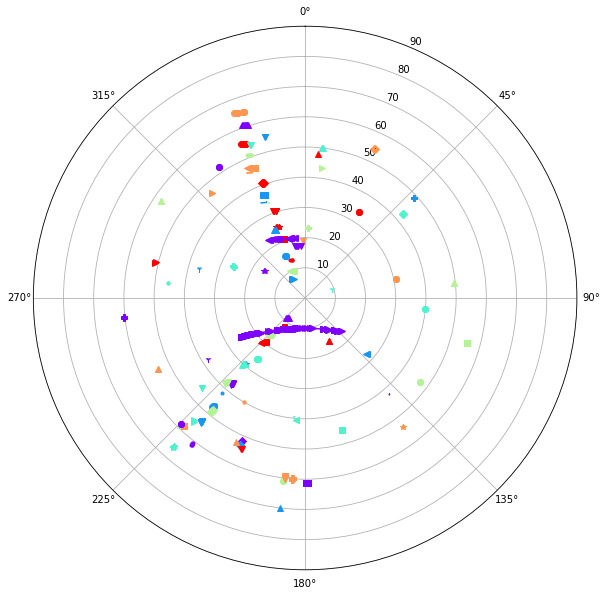

In [21]:
reporter.makePolarPlotForObjects()

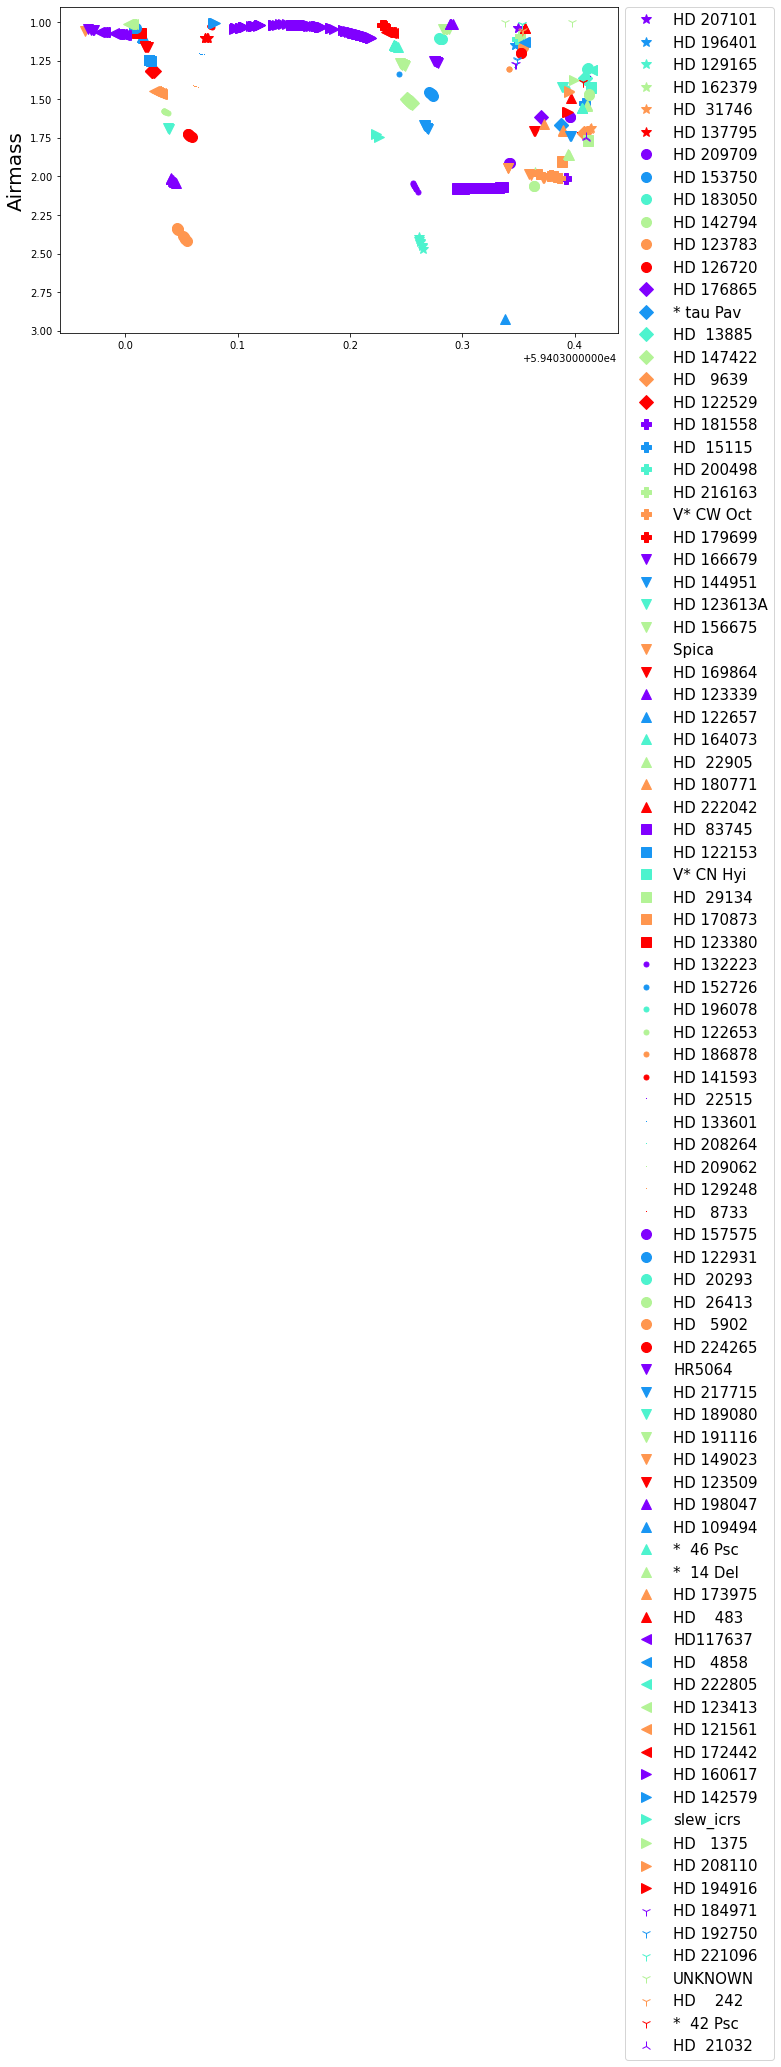

In [22]:
reporter.plotPerObjectAirMass()

In [23]:
reporter.printObsTable()

{seqNum} {imageType} {obj} {timeOfDay} {filt} {timeSinceLastExp} {expTime}
   1 bias      azel_target 21:36:34.162 RG610~empty                  0.0  0.00
   2 bias      azel_target 21:36:50.001 RG610~empty                 15.8  0.00
   3 bias      azel_target 21:36:54.499 RG610~empty                  4.5  0.00
   4 bias      azel_target 21:36:59.001 RG610~empty                  4.5  0.00
   5 bias      azel_target 21:37:03.500 RG610~empty                  4.5  0.00
   6 bias      azel_target 21:37:07.998 RG610~empty                  4.5  0.00
   7 bias      azel_target 21:37:12.501 RG610~empty                  4.5  0.00
   8 bias      azel_target 21:37:17.010 RG610~empty                  4.5  0.00
   9 bias      azel_target 21:37:21.518 RG610~empty                  4.5  0.00
  10 bias      azel_target 21:37:26.018 RG610~empty                  4.5  0.00
  11 bias      azel_target 21:37:30.513 RG610~empty                  4.5  0.00
  12 bias      azel_target 21:37:35.011 RG610~empty     

# Butler

## Configuration for Butler

In [35]:
#butler=dafPersist.Butler("/project/shared/auxTel")
butler=dafPersist.Butler(repoDir)

In [49]:
butler.getDatasetTypes()

{'deepCoadd_det',
 'singleFrameDriver_config',
 'dcr_assembleCoadd_metadata_filename',
 'processCcd_config_filename',
 'deepCoaddPsfMatched_nImage_visitInfo',
 'dcrCoadd_mergeDet_schema',
 'fgcmLookUpTable_schema',
 'calexp_wcs',
 'matchedVisitMetrics_config',
 'analysisCoaddTable_forced',
 'deblendCoaddSources_metadata',
 'transmission_atmosphere',
 'deepDiff_matchedExp_sub',
 'deepCoadd_mcalmax',
 'analysisCoaddTable_forced_filename',
 'refcat_len',
 'calexp_photoCalib',
 'deepCoaddPsfMatched_header_wcs',
 'deepDiff_warpedExp_filter',
 'forcedPhotCcd_metadata_filename',
 'dcrCoadd_calexp_header_wcs',
 'photoCalib_md',
 'dcrCoadd_skyMap',
 'measureLinearity_metadata',
 'fgcmStarIds_md',
 'fgcm_photoCalib_filename',
 'dcrCoaddPsfMatched_nImage_md',
 'deepCoadd_peak_schema_md',
 'forcedCcd_config',
 'transformed_src_filename',
 'fgcmCalibrateTract_config_filename',
 'binned_sensor_fits_filename',
 'measureCrosstalk_config',
 'ccdExposureId_bits',
 'fgcmStarIds',
 'postISRCCD_filename',


## Sequence selection

In [36]:
# wide scan
all_myseq_holo=range(234,310)
# narrow scan
#all_myseq_holo=range(317,365)
all_myseq=all_myseq_holo

In [37]:
seqNum=all_myseq_holo[0]

In [38]:
seqNum

234

## Display

In [39]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug_2021_07_07',url=os.environ["FIREFLY_URL"])

In [40]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [41]:
display1.mtv(raw)

In [42]:
display1.getClient().display_url()

In [58]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 5, 4, 6, 7, 10, 13, 9, 12, 8, 11, 16, 17, 18, 19, 14, 15, 25, 23, 22, 21, 24, 20, 28, 29, 31, 30, 26, 32, 27, 34, 39, 35, 36, 37, 38, 33, 41, 45, 43, 44, 40, 42, 50, 46, 48, 49, 47, 51, 52, 54, 53, 55, 57, 56, 58, 59, 60, 61, 62, 64, 63, 67, 68, 65, 66, 70, 69, 72, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 218, 221, 220, 22

In [43]:
#exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

NoResults: No locations for get: datasetType:quickLookExp dataId:DataId(initialdata={'dayObs': '2021-07-07', 'seqNum': 234}, tag=set())

In [45]:
#exp=butler.get('quickLook',dayObs=dayObs,seqNum=seqNum)

In [52]:
exp=butler.get('postISRCC',dayObs=dayObs,seqNum=seqNum)

AttributeError: 'LatissMapper' object has no attribute 'map_postISRCC'

{'deepCoadd_det',
 'singleFrameDriver_config',
 'dcr_assembleCoadd_metadata_filename',
 'processCcd_config_filename',
 'deepCoaddPsfMatched_nImage_visitInfo',
 'dcrCoadd_mergeDet_schema',
 'fgcmLookUpTable_schema',
 'calexp_wcs',
 'matchedVisitMetrics_config',
 'analysisCoaddTable_forced',
 'deblendCoaddSources_metadata',
 'transmission_atmosphere',
 'deepDiff_matchedExp_sub',
 'deepCoadd_mcalmax',
 'analysisCoaddTable_forced_filename',
 'refcat_len',
 'calexp_photoCalib',
 'deepCoaddPsfMatched_header_wcs',
 'deepDiff_warpedExp_filter',
 'forcedPhotCcd_metadata_filename',
 'dcrCoadd_calexp_header_wcs',
 'photoCalib_md',
 'dcrCoadd_skyMap',
 'measureLinearity_metadata',
 'fgcmStarIds_md',
 'fgcm_photoCalib_filename',
 'dcrCoaddPsfMatched_nImage_md',
 'deepCoadd_peak_schema_md',
 'forcedCcd_config',
 'transformed_src_filename',
 'fgcmCalibrateTract_config_filename',
 'binned_sensor_fits_filename',
 'measureCrosstalk_config',
 'ccdExposureId_bits',
 'fgcmStarIds',
 'postISRCCD_filename',


## Meta Data

In [60]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [61]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'COMMENT': ["  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  "= '        '",
  '---- Date, night and basic image information ----',
  "= '        '",
  '---- Telescope info, location, observer ----',
  "= '        '",
  '---- Pointing info, etc. ----',
  "= '        '",
  '---- TAN Projection ----',
  "= '        '",
  '---- Image-identifying used to build OBS-ID ----',
  "= '        '",
  '---- Test Stand information ----',
  "= '        '",
  '---- Information from Camera (Common block) ----',
  "= '        '",
  '---- Information from Camera ----',
  "= '        '",
  '---- Filter/grating information ----',
  "= '        '",
  '---- Exposure-related information ----',
  "= '        '",
  '---- Weather information ----',
  "= '        '",
  '---- Header information ----',
  "= '        '",
  '---- Checksums ----',
  '---- Information from Camera

# Start

In [62]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [63]:
all_my_raw_array=[]
all_my_header=[]
all_my_object=[]
all_my_seq=[]
all_my_grating=[]
all_my_filter=[]
all_my_date=[]


for seqNum in all_myseq:
    raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    
    header=md.toDict()
    
    #decode header
    
    obj_name=header['OBJECT']
    obj_name2 = ''.join(obj_name.split())
    grating=header['GRATING']
    obsid=header['OBSID']
    date=obsid.replace('AT_O_','') # remove pre-tag to get date only and seqnum
    filter_name=header['FILTER']
    filter_name2=filter_name.split("_")[0]   # cut empty_1 to empty
    
    # select only pre-selected disperser
    if grating == DISPERSER_SEL: 
        all_my_raw_array.append(np.copy(raw.image.array))
        all_my_header.append(header)
        all_my_object.append(obj_name2)
        all_my_seq.append(header['SEQNUM'])
        all_my_grating.append(grating)
        all_my_filter.append(filter_name2)
        all_my_date.append(date)

## Total number of images

In [64]:
NSEL=len(all_my_raw_array)

In [65]:
NSEL

48

# Plot

In [66]:
idx=0

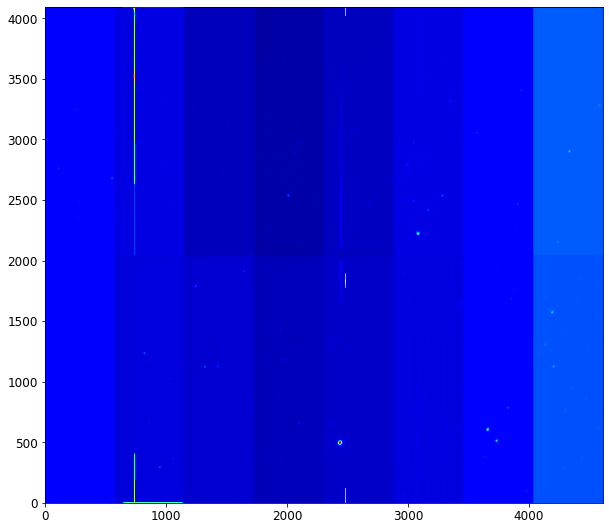

In [67]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
plt.show()

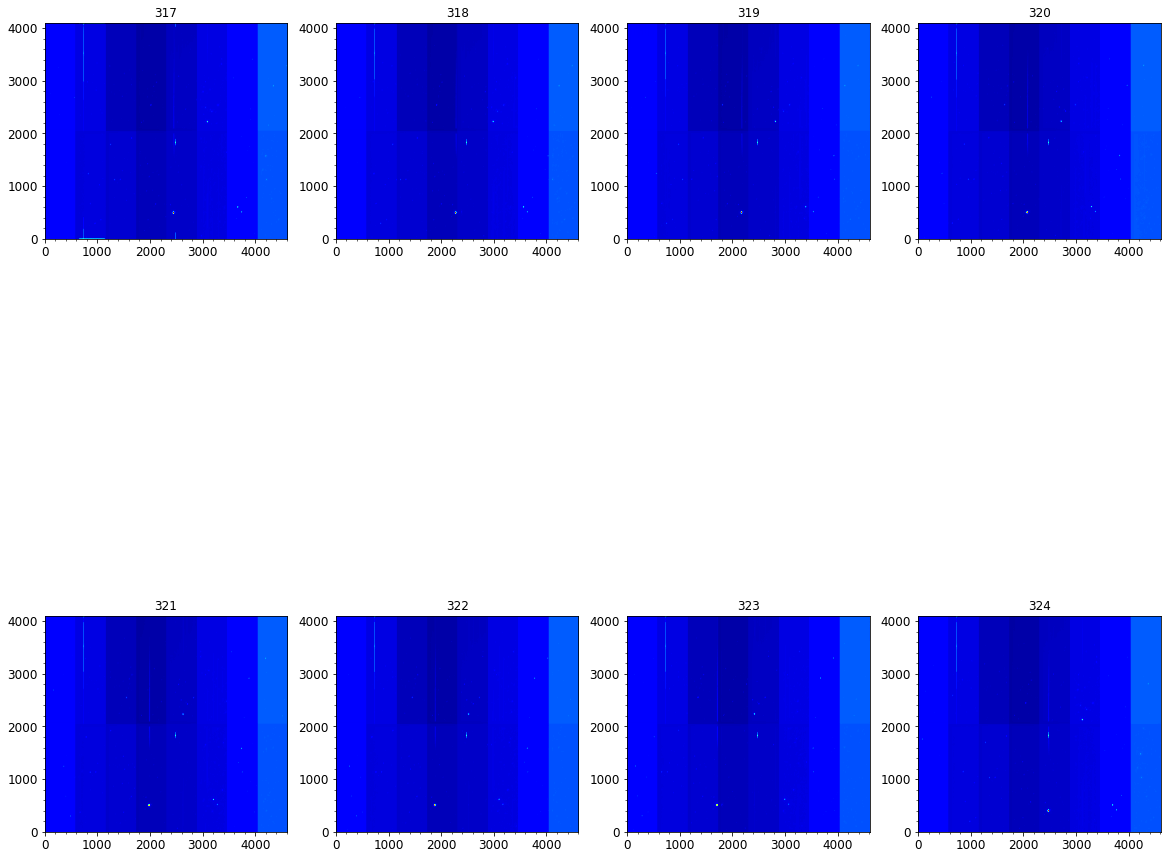

In [68]:

Ncol=4
Nrow=2
Ntot=Ncol*Nrow

fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    if idx>=NSEL:
        break
        
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx]) 
    ax.minorticks_on()
    ax.set_aspect("equal")
    
    #ax2=ax.twiny()
    #ax2.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    #ax2.set_xlim(ax.get_xlim())
    #ax2.minorticks_on()
    
    #ax.tick_params(which='major', length=10, width=2, direction='inout')
    #ax.tick_params(which='minor', length=5, width=2, direction='inout')
    #ax.grid(which='both')



    #ax.set_aspect('equal')

    #x1, x2 = ax.get_xlim() 
    #y1, y2 = ax.get_ylim() 
plt.show()

In [69]:
#all_my_raw_array=[]
#all_my_header=[]
#all_my_object=[]
#all_my_seq=[]
#all_my_grating=[]
#all_my_filter=[]


In [70]:
if FLAG_SAVE_IMAGE:
  
    for idx in np.arange(NSEL):
        filename=all_my_grating[idx]+"_"+all_my_filter[idx]+"_"+all_my_object[idx]+"_"+all_my_date[idx]+".fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        hdu = fits.PrimaryHDU(data=all_my_raw_array[idx],header=hdr)  # with headers
        #hdu = fits.PrimaryHDU(data=all_my_raw_array[idx])
    
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(filename,overwrite=True)
    
        

holo4_003_empty_HD160617_20210707_000317.fits
holo4_003_empty_HD160617_20210707_000318.fits
holo4_003_empty_HD160617_20210707_000319.fits
holo4_003_empty_HD160617_20210707_000320.fits
holo4_003_empty_HD160617_20210707_000321.fits
holo4_003_empty_HD160617_20210707_000322.fits
holo4_003_empty_HD160617_20210707_000323.fits
holo4_003_empty_HD160617_20210707_000324.fits
holo4_003_empty_HD160617_20210707_000325.fits
holo4_003_empty_HD160617_20210707_000326.fits
holo4_003_empty_HD160617_20210707_000327.fits
holo4_003_empty_HD160617_20210707_000328.fits
holo4_003_empty_HD160617_20210707_000329.fits
holo4_003_empty_HD160617_20210707_000330.fits
holo4_003_empty_HD160617_20210707_000331.fits
holo4_003_empty_HD160617_20210707_000332.fits
holo4_003_empty_HD160617_20210707_000333.fits
holo4_003_empty_HD160617_20210707_000334.fits
holo4_003_empty_HD160617_20210707_000335.fits
holo4_003_empty_HD160617_20210707_000336.fits
holo4_003_empty_HD160617_20210707_000337.fits
holo4_003_empty_HD160617_20210707_